In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
image = plt.imread("naruto_image.jpg")/255
image = np.array([image])
batch_size, height, width, channels = image.shape

In [31]:
image.shape

(1, 981, 736, 3)

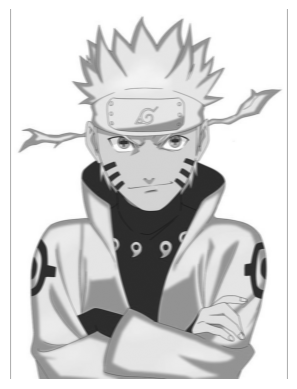

In [29]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
outputs = tf.nn.conv2d(image, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off")
plt.show()